# **Import Libraries**

In [839]:
import pandas as pd
import numpy as np
import matplotlib
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns 
from tqdm.notebook import tqdm_notebook
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report
import warnings
import tensorflow
import keras
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [840]:
print(f'matplotlib vesion: {matplotlib.__version__}')
print(f'pandas vesion:     {pd.__version__}')
print(f'numpy vesion:      {np.__version__}')
print(f'seaborn vesion:    {sns.__version__}')
print(f'sklearn vesion:    {skl.__version__}')

matplotlib vesion: 3.2.2
pandas vesion:     1.1.5
numpy vesion:      1.19.5
seaborn vesion:    0.11.1
sklearn vesion:    0.22.2.post1


# **load Datasets**

In [841]:
train = pd.read_csv('/content/drive/MyDrive/Projects/iX Mobile Banking Prediction Challenge/Train.csv')
test = pd.read_csv('/content/drive/MyDrive/Projects/iX Mobile Banking Prediction Challenge/Test.csv')

In [842]:
train.head(10)

,ID,country_code,region,age,FQ1,FQ2,FQ3,FQ4,FQ5,FQ6,FQ7,FQ8,FQ9,FQ10,FQ11,FQ12,FQ13,FQ14,FQ15,FQ16,FQ17,FQ18,FQ19,FQ20,FQ21,FQ22,FQ23,FQ24,FQ35,FQ36,FQ25,FQ26,FQ27,FQ28,FQ29,FQ30,FQ31,FQ32,FQ33,FQ34,FQ37,Target
0,ID_000J8GTZ,1,6,35.0,2,NaN,NaN,2,NaN,NaN,1.0,2,1,1,2.0,2,2,2,2,2,NaN,2,4.0,2.0,1.0,1,2,NaN,1.0,NaN,2,2,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,0,0
1,ID_000QLXZM,32,7,70.0,2,NaN,NaN,2,NaN,NaN,1.0,2,2,2,2.0,2,2,2,2,2,NaN,1,3.0,2.0,1.0,1,2,NaN,NaN,NaN,1,1,NaN,NaN,2.0,NaN,NaN,NaN,1.0,2.0,0,0
2,ID_001728I2,71,7,22.0,2,1.0,NaN,2,NaN,NaN,1.0,2,2,2,4.0,2,2,1,2,1,NaN,1,NaN,2.0,2.0,1,2,NaN,NaN,NaN,2,1,NaN,NaN,2.0,NaN,NaN,NaN,2.0,1.0,1,0
3,ID_001R7IDN,48,3,27.0,1,NaN,NaN,2,NaN,2.0,NaN,2,1,1,2.0,2,2,2,2,2,NaN,1,1.0,1.0,NaN,1,2,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,1,0
4,ID_0029QKF8,25,0,79.0,2,NaN,NaN,2,NaN,NaN,NaN,2,2,1,2.0,2,2,2,2,1,NaN,1,NaN,2.0,2.0,1,1,2.0,NaN,1.0,2,2,NaN,NaN,2.0,NaN,NaN,2.0,1.0,1.0,1,0
5,ID_002OY1ME,77,0,69.0,2,NaN,NaN,2,NaN,1.0,NaN,2,2,2,2.0,2,2,2,2,1,NaN,1,6.0,NaN,2.0,2,2,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1,0
6,ID_002SIOPQ,141,4,58.0,1,NaN,2.0,2,NaN,1.0,NaN,2,2,2,1.0,1,2,1,2,2,NaN,1,2.0,1.0,2.0,1,2,2.0,NaN,NaN,1,2,NaN,NaN,2.0,NaN,NaN,NaN,1.0,1.0,0,0
7,ID_003CXK49,97,7,32.0,1,NaN,2.0,2,NaN,2.0,NaN,2,2,2,2.0,2,1,2,2,2,NaN,1,2.0,NaN,2.0,2,2,NaN,NaN,NaN,1,2,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0,0
8,ID_003OKZ71,60,2,59.0,1,1.0,2.0,2,NaN,NaN,NaN,2,2,2,2.0,2,2,2,2,1,NaN,2,NaN,2.0,2.0,2,2,NaN,2.0,NaN,2,2,NaN,NaN,2.0,NaN,NaN,NaN,1.0,1.0,1,0
9,ID_004ACG4R,69,0,60.0,2,NaN,NaN,2,1.0,2.0,2.0,2,2,2,2.0,2,2,2,1,2,2.0,1,4.0,2.0,2.0,2,2,NaN,NaN,NaN,2,2,NaN,NaN,2.0,NaN,NaN,2.0,1.0,NaN,1,0


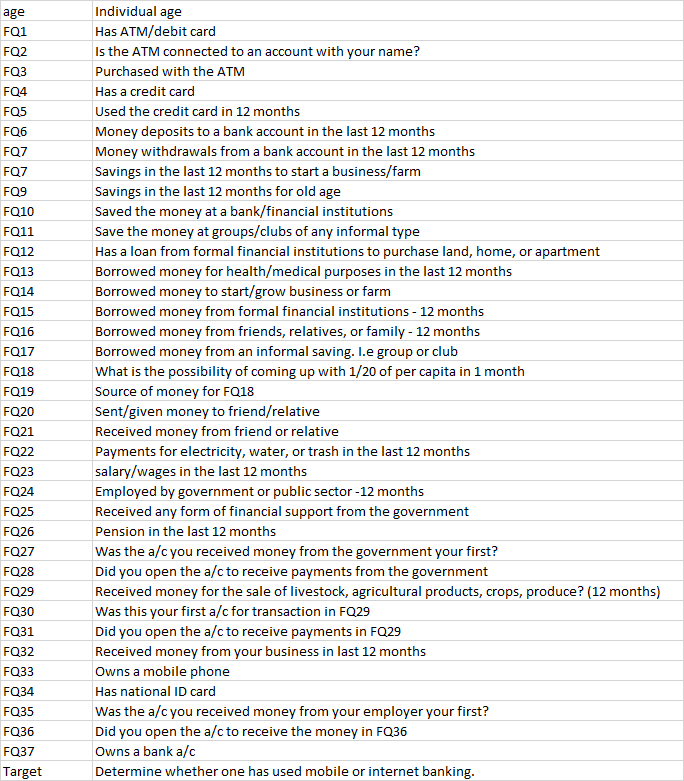

In [843]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
country_code,108446.0,68.544953,41.529264,0.0,33.0,65.0,105.0,143.0
region,108446.0,2.894242,2.286505,-1.0,1.0,3.0,4.0,7.0
age,108124.0,41.857395,17.876105,15.0,27.0,39.0,55.0,99.0
FQ1,108446.0,1.563294,0.530077,1.0,1.0,2.0,2.0,4.0
FQ2,49124.0,1.063716,0.288075,1.0,1.0,1.0,1.0,4.0
FQ3,46218.0,1.299710,0.468503,1.0,1.0,1.0,2.0,4.0
FQ4,108446.0,1.824622,0.435942,1.0,2.0,2.0,2.0,4.0
FQ5,21185.0,1.160113,0.383827,1.0,1.0,1.0,1.0,4.0
FQ6,60659.0,1.223907,0.450140,1.0,1.0,1.0,1.0,4.0
FQ7,60620.0,1.206961,0.440780,1.0,1.0,1.0,1.0,4.0


In [844]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108446 entries, 0 to 108445
Data columns (total 42 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            108446 non-null  object 
 1   country_code  108446 non-null  int64  
 2   region        108446 non-null  int64  
 3   age           108124 non-null  float64
 4   FQ1           108446 non-null  int64  
 5   FQ2           49124 non-null   float64
 6   FQ3           46218 non-null   float64
 7   FQ4           108446 non-null  int64  
 8   FQ5           21185 non-null   float64
 9   FQ6           60659 non-null   float64
 10  FQ7           60620 non-null   float64
 11  FQ8           108446 non-null  int64  
 12  FQ9           108446 non-null  int64  
 13  FQ10          108446 non-null  int64  
 14  FQ11          83876 non-null   float64
 15  FQ12          108446 non-null  int64  
 16  FQ13          108446 non-null  int64  
 17  FQ14          108446 non-null  int64  
 18  FQ15

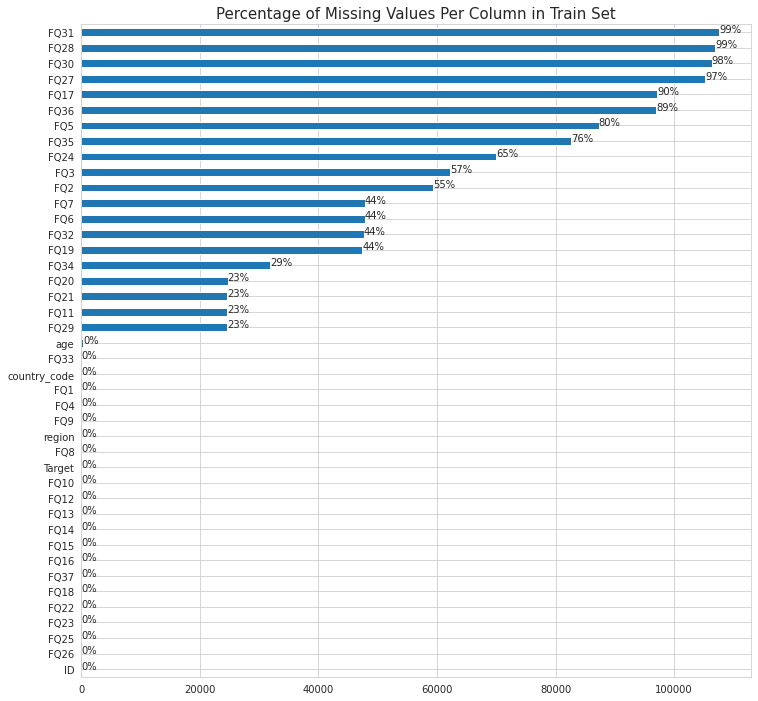

In [845]:
# Check if there any missing values in train set
ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (12, 12))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [846]:
# Combine train and test set
ntrain = train.shape[0] # to be used to split train and test set from the combined dataframe

all_data = pd.concat((train, test)).reset_index(drop=True)

In [847]:
all_data.shape

(154923, 42)

In [848]:
# #droping columns with more than 60% missing values
all_data.drop(['FQ5','FQ36','FQ17','FQ27','FQ30','FQ28','FQ31'],
              axis = 1,
              inplace = True)

In [849]:
mean_age = all_data['age'].mean()
all_data['age'].fillna(mean_age, inplace= True)

In [850]:
not_missing_cols = all_data.loc[:,np.all(~ all_data.isnull(), axis=0)].columns.difference(["ID","Target"])
missing_cols = all_data.columns.difference(not_missing_col).difference(["Target"])

In [851]:
def KNN_impute(data, column, n_neighbors):
  missing_rows = data.loc[data[column].isnull(),:]  #rows that are missing on the chosen column
  not_missing_rows = data.loc[~ data[column].isnull(),:] #rows that are not missing values on the chosen column

  #creating the KNN object
  knn = KNeighborsClassifier(n_neighbors= n_neighbors)
  #training the model on the rows that are not missing 
  knn.fit(not_missing_rows[not_missing_cols],not_missing_rows[column])
  #predicting the rows that are missing
  pred_missing = knn.predict(missing_rows[not_missing_cols])

  data.loc[data[column].isnull(),column] = pred_missing
  
  return data

In [852]:
#Imputing missing values in all columns that have missing
for col in missing_cols:
  all_data = KNN_impute(all_data, col, 4)

In [853]:
all_data

,ID,country_code,region,age,FQ1,FQ2,FQ3,FQ4,FQ6,FQ7,FQ8,FQ9,FQ10,FQ11,FQ12,FQ13,FQ14,FQ15,FQ16,FQ18,FQ19,FQ20,FQ21,FQ22,FQ23,FQ24,FQ35,FQ25,FQ26,FQ29,FQ32,FQ33,FQ34,FQ37,Target
0,ID_000J8GTZ,1,6,35.0,2,1.0,1.0,2,1.0,1.0,2,1,1,2.0,2,2,2,2,2,2,4.0,2.0,1.0,1,2,2.0,1.0,2,2,1.0,2.0,1.0,1.0,0,0.0
1,ID_000QLXZM,32,7,70.0,2,1.0,1.0,2,1.0,1.0,2,2,2,2.0,2,2,2,2,2,1,3.0,2.0,1.0,1,2,2.0,2.0,1,1,2.0,2.0,1.0,2.0,0,0.0
2,ID_001728I2,71,7,22.0,2,1.0,1.0,2,1.0,1.0,2,2,2,4.0,2,2,1,2,1,1,2.0,2.0,2.0,1,2,2.0,1.0,2,1,2.0,2.0,2.0,1.0,1,0.0
3,ID_001R7IDN,48,3,27.0,1,1.0,1.0,2,2.0,1.0,2,1,1,2.0,2,2,2,2,2,1,1.0,1.0,2.0,1,2,2.0,1.0,2,2,2.0,2.0,1.0,1.0,1,0.0
4,ID_0029QKF8,25,0,79.0,2,1.0,1.0,2,1.0,1.0,2,2,1,2.0,2,2,2,2,1,1,2.0,2.0,2.0,1,1,2.0,1.0,2,2,2.0,2.0,1.0,1.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154918,ID_ZZYOTVBJ,112,3,38.0,1,1.0,1.0,2,1.0,1.0,2,2,2,2.0,1,2,2,2,2,1,1.0,2.0,2.0,2,2,1.0,1.0,2,2,4.0,2.0,1.0,1.0,1,NaN
154919,ID_ZZYSX122,82,2,77.0,2,1.0,1.0,2,1.0,1.0,1,2,1,2.0,2,2,2,2,1,3,1.0,2.0,2.0,2,2,2.0,2.0,2,1,2.0,2.0,1.0,2.0,1,NaN
154920,ID_ZZYXQDSD,93,5,26.0,2,1.0,1.0,2,1.0,1.0,1,1,2,2.0,2,1,2,2,1,2,1.0,2.0,2.0,1,4,2.0,1.0,1,2,2.0,2.0,1.0,1.0,1,NaN
154921,ID_ZZZH9SS4,6,7,59.0,2,1.0,1.0,2,1.0,1.0,2,2,2,1.0,2,2,2,2,2,2,3.0,2.0,2.0,2,2,2.0,2.0,2,2,2.0,2.0,1.0,1.0,1,NaN


In [854]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154923 entries, 0 to 154922
Data columns (total 35 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            154923 non-null  object 
 1   country_code  154923 non-null  int64  
 2   region        154923 non-null  int64  
 3   age           154923 non-null  float64
 4   FQ1           154923 non-null  int64  
 5   FQ2           154923 non-null  float64
 6   FQ3           154923 non-null  float64
 7   FQ4           154923 non-null  int64  
 8   FQ6           154923 non-null  float64
 9   FQ7           154923 non-null  float64
 10  FQ8           154923 non-null  int64  
 11  FQ9           154923 non-null  int64  
 12  FQ10          154923 non-null  int64  
 13  FQ11          154923 non-null  float64
 14  FQ12          154923 non-null  int64  
 15  FQ13          154923 non-null  int64  
 16  FQ14          154923 non-null  int64  
 17  FQ15          154923 non-null  int64  
 18  FQ16

In [855]:
for col in all_data.columns.difference(['Target']):
  if all_data[col].dtype == 'float64':
    all_data[col] = all_data[col].astype(int)

In [856]:
#Target Encoding
for col in all_data.columns.difference(['Target','age']):
  all_data[col] = all_data[col].map(all_data.groupby(col)['Target'].mean())

In [857]:
# Separate train and test data from the combined dataframe
train_df = all_data[:ntrain]
test_df = all_data[ntrain:]

# Check the shapes of the split dataset
train_df.shape, test_df.shape

((108446, 35), (46477, 35))

In [858]:
X = train_df.iloc[:,1:-1]
y = train_df['Target']

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

In [859]:
def evaluate_model(y_test,y_pred):                                              #function return classifations matrix for every model
  acc = round(accuracy_score(y_test, y_pred),2)
  prec = round(precision_score(y_test, y_pred),2)                               # tp / (tp + fp)
  rec = round(recall_score(y_test, y_pred),2)                                   # tp / (tp + fn)
  f1 = round(f1_score(y_test, y_pred),2)
  return pd.DataFrame({'Metrics':['Accuracy','Precision','Recall','F1'],
                       'Scores':[acc,prec,rec,f1]})
  

In [860]:
# Confusion matrix
def confusion_mat(y_test,y_pred):
  cm = confusion_matrix(y_test, y_pred)
  df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
  plt.figure(figsize = (8,6))
  plt.title('Confusing Matrix')
  sns.set(font_scale=1.4)
  sns.heatmap(df_cm, annot=True, fmt='g')

In [861]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

model = LGBMClassifier()

# Import StratifiedKFold
from sklearn.model_selection import StratifiedKFold
# Create a StratifiedKFold object
str_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

features = train_df.columns.difference(['ID','Target'])

fold_metrics = []

for train_index, test_index in str_kf.split(train_df.iloc[:,1:],train_df.Target):
  cv_train, cv_test = train_df.iloc[train_index], train_df.iloc[test_index]
# Train a model
  model.fit(cv_train[features],cv_train.Target)
# Make predictions
  predictions = model.predict(cv_test[features])
# Calculate the metric
  metric = roc_auc_score(cv_test.Target, predictions)
  fold_metrics.append(metric)

np.mean(fold_metrics), np.std(fold_metrics)

(0.5000139740682101, 8.54855235830499e-05)

In [862]:
y_pred = model.predict(X_test)

evaluate_model(y_test,y_pred)

,Metrics,Scores
0,Accuracy,0.72
1,Precision,0.00
2,Recall,0.00
3,F1,0.00


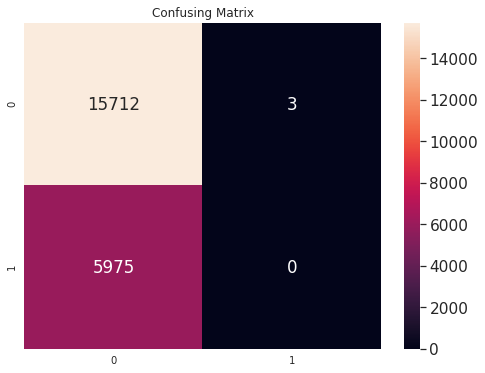

In [863]:
confusion_mat(y_test,y_pred)

In [864]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.72      1.00      0.84     15715
         1.0       0.00      0.00      0.00      5975

    accuracy                           0.72     21690
   macro avg       0.36      0.50      0.42     21690
weighted avg       0.52      0.72      0.61     21690



[Text(0, 0, 'FQ33'),
 Text(0, 0, 'FQ34'),
 Text(0, 0, 'FQ37'),
 Text(0, 0, 'FQ8'),
 Text(0, 0, 'FQ12'),
 Text(0, 0, 'FQ7'),
 Text(0, 0, 'country_code'),
 Text(0, 0, 'FQ23'),
 Text(0, 0, 'FQ6'),
 Text(0, 0, 'FQ13'),
 Text(0, 0, 'FQ18'),
 Text(0, 0, 'FQ24'),
 Text(0, 0, 'FQ10'),
 Text(0, 0, 'FQ11'),
 Text(0, 0, 'region'),
 Text(0, 0, 'FQ35'),
 Text(0, 0, 'FQ32'),
 Text(0, 0, 'FQ14'),
 Text(0, 0, 'FQ21'),
 Text(0, 0, 'FQ29'),
 Text(0, 0, 'FQ15'),
 Text(0, 0, 'FQ19'),
 Text(0, 0, 'FQ2'),
 Text(0, 0, 'FQ25'),
 Text(0, 0, 'FQ1'),
 Text(0, 0, 'age'),
 Text(0, 0, 'FQ20'),
 Text(0, 0, 'FQ26'),
 Text(0, 0, 'FQ3'),
 Text(0, 0, 'FQ16'),
 Text(0, 0, 'FQ4'),
 Text(0, 0, 'FQ22'),
 Text(0, 0, 'FQ9')]

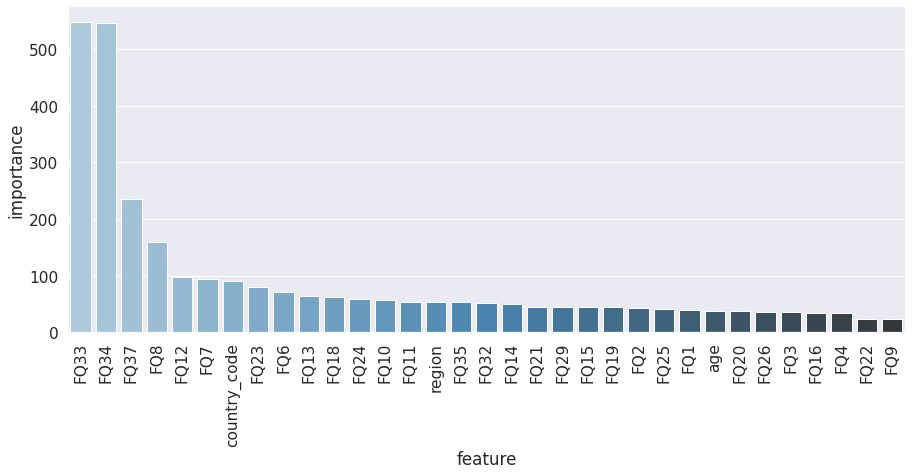

In [865]:
importance = model.feature_importances_

importance_df = pd.DataFrame({'feature':X_train.columns,
'importance':importance})
importance_df.sort_values('importance',ascending = False,inplace=True)

f, ax = plt.subplots(figsize = (15,6))
ax = sns.barplot(data=importance_df,x='feature', y = 'importance',
palette="Blues_d")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [866]:
ss = pd.read_csv('/content/drive/MyDrive/Projects/iX Mobile Banking Prediction Challenge/SampleSubmission.csv')
# Make prediction on the test set
# test_df = test_df[main_cols]

predictions = model.predict_proba(test_df[features])
pred_df = pd.DataFrame(predictions, columns=['0','1'])
# Create a submission file
sub_file = ss.copy()
sub_file.Target = pred_df['1']

In [867]:
# Create a csv file and upload to zindi 
sub_file.to_csv('My_sub.csv', index = False)